# **Predictive Maintenance Model to Predict When a Milling Tool Tip is Likely to Fail**

Downloading dependencies

In [ ]:
!pip install pycaret[full]


#**SETUP**

In [ ]:
import pandas as pd
df = pd.read_csv('predictive_maintenance.csv', delimiter=",")
df

In [ ]:

## Converting temperature in centigrate from Kelvin [1 K = -272.15 °C  ]
df["Air temperature [K]"] = df["Air temperature [K]"] - 272.15
df["Process temperature [K]"] = df["Process temperature [K]"] - 272.15

# Renaming temperature in Centigrate(°C) from Kelvin (K)
df.rename(columns={"Air temperature [K]" : "Air temperature [°C]","Process temperature [K]" : "Process temperature [°C]"},inplace=True)

# Delete first two columns ( Product ID irrelvant since product type is already a col which contains the first letter of product ID and udi is meaningless)
df = df.drop(df.columns[0], axis=1)
df = df.drop(df.columns[0], axis=1)
# drop failure target(failure(1) or no failure(0)) b/c we are keeping failure type as the target to predict each kind of failure
df = df.drop(df.columns[6], axis=1)
df


,Type,Air temperature [°C],Process temperature [°C],Rotational speed [rpm],Torque [Nm],Tool wear [min],Failure Type
0,M,25.95,36.45,1551,42.8,0,No Failure
1,L,26.05,36.55,1408,46.3,3,No Failure
2,L,25.95,36.35,1498,49.4,5,No Failure
3,L,26.05,36.45,1433,39.5,7,No Failure
4,L,26.05,36.55,1408,40.0,9,No Failure
...,...,...,...,...,...,...,...
9995,M,26.65,36.25,1604,29.5,14,No Failure
9996,H,26.75,36.25,1632,31.8,17,No Failure
9997,M,26.85,36.45,1645,33.4,22,No Failure
9998,H,26.85,36.55,1408,48.5,25,No Failure


In [ ]:
from pycaret.classification import *
s = setup(df, target = 'Failure Type', session_id = 123)

,Description,Value
0,Session id,123
1,Target,Failure Type
2,Target type,Multiclass
3,Target mapping,"Heat Dissipation Failure: 0, No Failure: 1, Overstrain Failure: 2, Power Failure: 3, Random Failures: 4, Tool Wear Failure: 5"
4,Original data shape,"(10000, 7)"
5,Transformed data shape,"(10000, 9)"
6,Transformed train set shape,"(7000, 9)"
7,Transformed test set shape,"(3000, 9)"
8,Numeric features,5
9,Categorical features,1


In [ ]:
# import ClassificationExperiment and init the class
from pycaret.classification import ClassificationExperiment
exp = ClassificationExperiment()
# init setup on exp
exp.setup(df, target = 'Failure Type', session_id = 123)

,Description,Value
0,Session id,123
1,Target,Failure Type
2,Target type,Multiclass
3,Target mapping,"Heat Dissipation Failure: 0, No Failure: 1, Overstrain Failure: 2, Power Failure: 3, Random Failures: 4, Tool Wear Failure: 5"
4,Original data shape,"(10000, 7)"
5,Transformed data shape,"(10000, 9)"
6,Transformed train set shape,"(7000, 9)"
7,Transformed test set shape,"(3000, 9)"
8,Numeric features,5
9,Categorical features,1


# **Compare Models**

In [ ]:
# compare models using OOP
best = compare_models() # outputs best preforming model



,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,0.9849,0.9474,0.9849,0.9797,0.9817,0.7454,0.7548,0.9320
lightgbm,Light Gradient Boosting Machine,0.9849,0.9425,0.9849,0.9796,0.9816,0.7376,0.7512,2.6460
catboost,CatBoost Classifier,0.9846,0.9523,0.9846,0.9782,0.9809,0.7333,0.7467,13.3090
gbc,Gradient Boosting Classifier,0.9817,0.9462,0.9817,0.9776,0.9791,0.6986,0.7066,5.8780
rf,Random Forest Classifier,0.9791,0.9547,0.9791,0.9721,0.9738,0.5967,0.6323,0.8180
dt,Decision Tree Classifier,0.9776,0.8347,0.9776,0.9772,0.9771,0.6660,0.6674,0.2100
et,Extra Trees Classifier,0.9739,0.9431,0.9739,0.9643,0.9648,0.4112,0.4955,0.7250
lr,Logistic Regression,0.9706,0.9372,0.9706,0.9563,0.9622,0.4000,0.4400,3.6430
knn,K Neighbors Classifier,0.9677,0.7500,0.9677,0.9499,0.9563,0.2314,0.3092,0.2820
lda,Linear Discriminant Analysis,0.9663,0.9414,0.9663,0.9501,0.9573,0.3315,0.3606,0.1090


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

In [ ]:
exp.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,0.9849,0.9474,0.9849,0.9797,0.9817,0.7454,0.7548,0.5660
lightgbm,Light Gradient Boosting Machine,0.9849,0.9425,0.9849,0.9796,0.9816,0.7376,0.7512,2.7850
catboost,CatBoost Classifier,0.9846,0.9523,0.9846,0.9782,0.9809,0.7333,0.7467,13.7700
gbc,Gradient Boosting Classifier,0.9817,0.9462,0.9817,0.9776,0.9791,0.6986,0.7066,5.8690
rf,Random Forest Classifier,0.9791,0.9547,0.9791,0.9721,0.9738,0.5967,0.6323,1.1600
dt,Decision Tree Classifier,0.9776,0.8347,0.9776,0.9772,0.9771,0.6660,0.6674,0.1280
et,Extra Trees Classifier,0.9739,0.9431,0.9739,0.9643,0.9648,0.4112,0.4955,0.8160
lr,Logistic Regression,0.9706,0.9372,0.9706,0.9563,0.9622,0.4000,0.4400,2.0860
knn,K Neighbors Classifier,0.9677,0.7500,0.9677,0.9499,0.9563,0.2314,0.3092,0.1410
lda,Linear Discriminant Analysis,0.9663,0.9414,0.9663,0.9501,0.9573,0.3315,0.3606,0.2140


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device='cpu', early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=-1,
              num_parallel_tree=None, objective='multi:softprob', ...)

# **Analyse Best Performing Model**

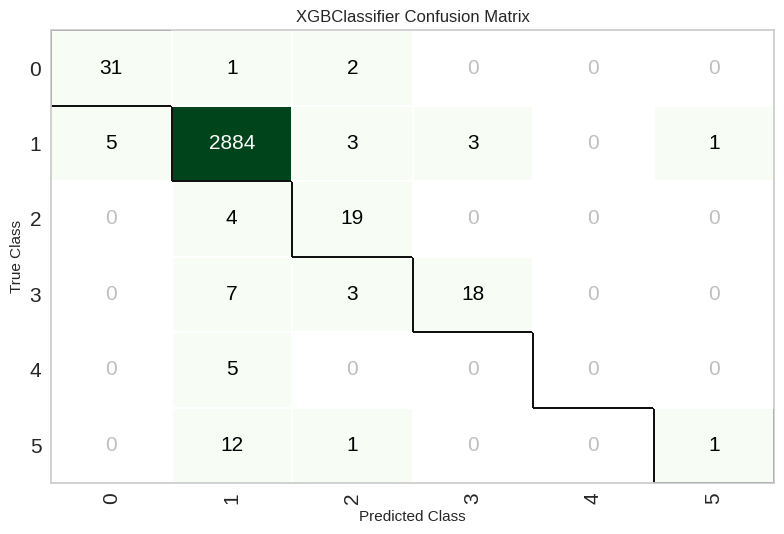

In [ ]:
# plot confusion matrix
plot_model(best, plot = 'confusion_matrix')

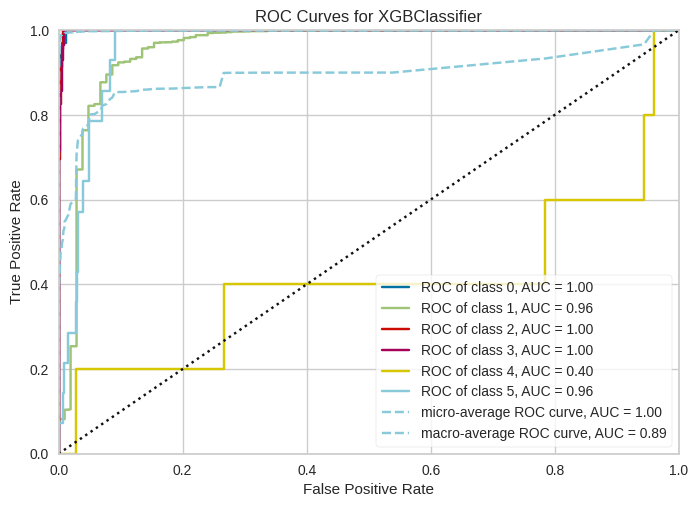

In [ ]:
# plot AUC
plot_model(best, plot = 'auc')

In [ ]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

# **Prediction**

In [ ]:
# predict on test set
holdout_pred = predict_model(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extreme Gradient Boosting,0.9843,0.9580,0.9843,0.9810,0.9817,0.7489,0.7521


In [ ]:
# show predictions df
holdout_pred.head()

,Type,Air temperature [°C],Process temperature [°C],Rotational speed [rpm],Torque [Nm],Tool wear [min],Failure Type,prediction_label,prediction_score
3592,H,29.450001,38.250000,1369,45.400002,156,No Failure,No Failure,0.9154
4608,M,30.850000,39.049999,1519,38.000000,139,No Failure,No Failure,0.9999
6545,M,29.250000,38.650002,1738,30.299999,104,No Failure,No Failure,1.0000
1680,M,25.750000,35.250000,1610,34.599998,219,No Failure,No Failure,0.8479
587,H,25.450001,37.349998,1623,33.099998,224,No Failure,No Failure,0.9967


# **Creating new unseen data**




In [ ]:
import numpy as np

# Assuming df is your original DataFrame
# Replace this with your actual data loading or DataFrame creation
#df_new = df.copy()

# Specify the columns and their corresponding scale values
column_scales = {'Air temperature [°C]': 10, 'Process temperature [°C]': 10, 'Rotational speed [rpm]': 500, 'Torque [Nm]': 10, 'Tool wear [min]': 10}

# Create a copy of the DataFrame
df_noisy = df.copy()

# Add positive Gaussian noise to specified columns with individual scale values
for column, scale in column_scales.items():
    noise = np.abs(np.random.normal(loc=0, scale=scale, size=len(df_noisy)))
    df_noisy[column] = df_noisy[column] + noise

#drop Failure type col for unseen data
df_noisy = df_noisy.drop(df.columns[6], axis=1)


In [ ]:
df

,Type,Air temperature [°C],Process temperature [°C],Rotational speed [rpm],Torque [Nm],Tool wear [min],Failure Type
0,M,25.95,36.45,1551,42.8,0,No Failure
1,L,26.05,36.55,1408,46.3,3,No Failure
2,L,25.95,36.35,1498,49.4,5,No Failure
3,L,26.05,36.45,1433,39.5,7,No Failure
4,L,26.05,36.55,1408,40.0,9,No Failure
...,...,...,...,...,...,...,...
9995,M,26.65,36.25,1604,29.5,14,No Failure
9996,H,26.75,36.25,1632,31.8,17,No Failure
9997,M,26.85,36.45,1645,33.4,22,No Failure
9998,H,26.85,36.55,1408,48.5,25,No Failure


In [ ]:
df_noisy

,Type,Air temperature [°C],Process temperature [°C],Rotational speed [rpm],Torque [Nm],Tool wear [min]
0,M,36.806306,48.859697,2066.796740,53.341704,19.122499
1,L,36.023454,39.679468,2073.972442,54.130113,5.682714
2,L,28.779785,44.839468,1545.921947,67.679008,12.793492
3,L,41.112947,60.229526,1891.784373,56.968072,17.975299
4,L,31.836003,43.125006,2412.352267,53.282585,19.392174
...,...,...,...,...,...,...
9995,M,32.629176,45.722543,2318.140240,30.026218,19.075391
9996,H,40.729318,38.836110,1847.250588,35.467867,28.818124
9997,M,31.572664,50.478398,2217.362796,38.656233,26.236685
9998,H,32.669644,46.995409,1644.840820,58.448002,35.752353


# **predicting the labels on unseen dataset**

In [ ]:
# predict model on new_data
predictions = predict_model(best, data = df_noisy)
predictions.sample(10)

,Type,Air temperature [°C],Process temperature [°C],Rotational speed [rpm],Torque [Nm],Tool wear [min],prediction_label,prediction_score
2656,L,29.188786,58.081791,1457.196899,64.606392,182.646072,Power Failure,0.9911
445,L,26.779900,51.128872,2688.923340,32.772774,70.737579,No Failure,1.0000
9505,L,31.542757,54.828747,1812.696777,48.862148,36.322708,No Failure,0.9999
332,M,30.637039,36.643150,2043.994385,55.883892,18.203213,No Failure,0.9980
4168,L,30.346714,40.836857,1637.764038,34.461365,129.621017,No Failure,1.0000
2364,L,31.741541,45.643970,1669.133301,65.317459,96.241638,Power Failure,0.9956
6097,H,30.445154,39.759457,1485.308838,42.607693,47.808937,No Failure,0.9999
7,L,30.239126,47.265102,1606.140503,44.920883,32.478931,No Failure,1.0000
7752,M,31.834177,48.758232,1887.635986,40.035461,179.218750,No Failure,0.9998
4453,L,39.835476,44.501381,2029.747192,56.572701,176.183777,No Failure,0.9791


In [ ]:
# save pipeline
save_model(best, 'my_first_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Air temperature [°C]',
                                              'Process temperature [°C]',
                                              'Rotational speed [rpm]',
                                              'Torque [Nm]', 'Tool wear [min]'],
                                     transformer=SimpleImputer(add_indicator=F...
                                importance_type=None,
                                interaction_constraints=None, learning_rate=None,
                                max_bin=None, max_cat_threshold=None,
                                max_cat_to_onehot=None, max_delta_step=None,
                  

In [ ]:
# load pipeline
loaded_best_pipeline = load_model('my_first_pipeline')
loaded_best_pipeline

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['Air temperature [°C]',
                                             'Process temperature [°C]',
                                             'Rotational speed [rpm]',
                                             'Torque [Nm]', 'Tool wear [min]'],
                                    transformer=SimpleImputer(add_...
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=-1,
                               num_parallel_tree=None,
                               objective='multi:softprob', ...))],
         verbose=False)